In [1]:
import pandas as pd

# Load example dataset
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    header=None,
    sep=",\s*",
    engine='python'
)


# Print the first few rows of the dataset
print(df.head())


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cd/fyn3h6dn31jb9cq7w2h7nrmh0000gn/T/ipykernel_55275/1910437811.py:7: SyntaxWarning: invalid escape sequence '\s'
  sep=",\s*",


   0                 1       2          3   4                   5   \
0  39         State-gov   77516  Bachelors  13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
2  38           Private  215646    HS-grad   9            Divorced   
3  53           Private  234721       11th   7  Married-civ-spouse   
4  28           Private  338409  Bachelors  13  Married-civ-spouse   

                  6              7      8       9     10  11  12  \
0       Adm-clerical  Not-in-family  White    Male  2174   0  40   
1    Exec-managerial        Husband  White    Male     0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male     0   0  40   
3  Handlers-cleaners        Husband  Black    Male     0   0  40   
4     Prof-specialty           Wife  Black  Female     0   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K  


In [2]:
#Print the data shape, number of rows and columns
print(df.shape)

df.columns = ['age', 'type_employer', 'fnlwgt', 
              'education', 'education_num', 'marital', 
              'occupation',' relationship', 'race', 
              'sex', 'capital_gain', 'capital_loss', 
              'hr_per_week', 'country', 'income']

counts = df.groupby('country').size()

print(counts.head(20))


(32561, 15)
country
?                     583
Cambodia               19
Canada                121
China                  75
Columbia               59
Cuba                   95
Dominican-Republic     70
Ecuador                28
El-Salvador           106
England                90
France                 29
Germany               137
Greece                 29
Guatemala              64
Haiti                  44
Holand-Netherlands      1
Honduras               13
Hong                   20
Hungary                13
India                 100
dtype: int64


In [3]:
ml = df[df['sex'] == 'Male']

ml1 = df[(df['sex'] == 'Male') & (df['income'] == '>50K') ]

fm = df[(df['sex'] == 'Female')]

fm1 = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]


df1 = df[(df['income'] =='>50K')]

print('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.')
print('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.')
print('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


In [4]:
print('The average age of men is: ', 
    ml['age'].mean())
      
print('The average age of women is: ',
    fm['age'].mean())

print('The average age of high-income men is: ',
    ml1['age'].mean())

print('The average age of high-income women is: ',
    fm1['age'].mean())

The average age of men is:  39.43354749885268
The average age of women is:  36.85823043357163
The average age of high-income men is:  44.62578805163614
The average age of high-income women is:  42.125530110262936


In [5]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()

print('Statistics of age for men: mu:',
    ml_mu, 'var:', ml_var, 'std:', ml_std)

print('Statistics of age for women: mu:',
    fm_mu, 'var:', fm_var, 'std:', fm_std)

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174529985 std: 13.370630192526448
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948063 std: 14.013697099438332


In [6]:
ml_median = ml['age'].median()
fm_median = fm['age'].median()
print("Median age per men and women: ", ml_median, fm_median)

ml_median_age = ml1['age'].median()
fm_median_age = fm1['age'].median()
print("Median age per men and women with high-income: ", ml_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


In [7]:
#%pip install matplotlib

<Axes: >

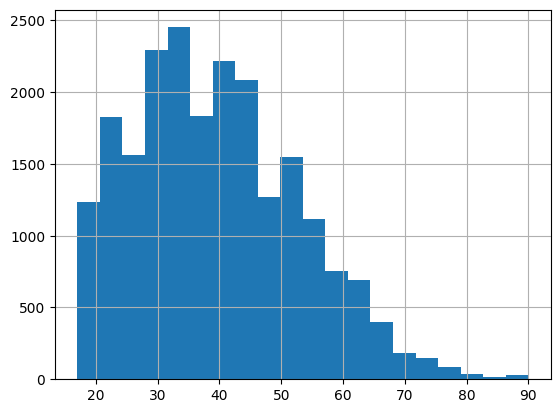

In [8]:
ml_age = ml['age']
ml_age.hist(density = 0, histtype = 'stepfilled', bins = 20)


<Axes: >

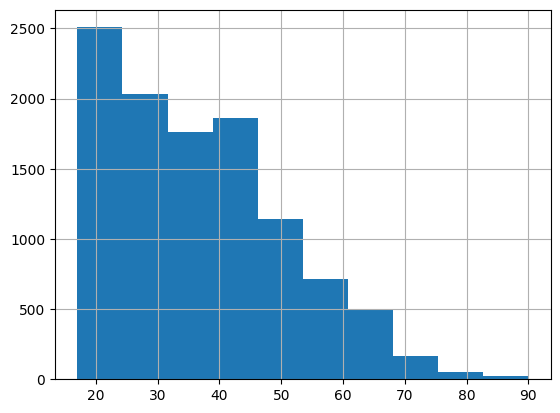

In [9]:

fm_age = fm['age']
fm_age.hist(density = 0, histtype = 'stepfilled', bins = 10)


In [ ]:
%pip install seaborn

<Axes: >

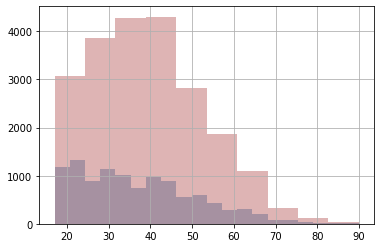

In [9]:
import seaborn as sns

fm_age.hist(density = 0, histtype = 'stepfilled', alpha= .5, bins=20)

ml_age.hist(density = 0, histtype = 'stepfilled', alpha= .5, color = sns.desaturate("indianred", .75), bins = 10)

We can normalize the frequencies of the histogram by dividing/normalizing by n, the number of samples. The normalized histogram is called the Probability Mass Function (PMF).

<Axes: >

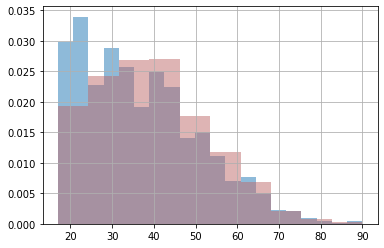

In [10]:

fm_age.hist(density = 1, histtype = 'stepfilled', alpha= .5, bins=20)

ml_age.hist(density = 1, histtype = 'stepfilled', alpha= .5, color = sns.desaturate("indianred", .75), bins = 10)

<Axes: >

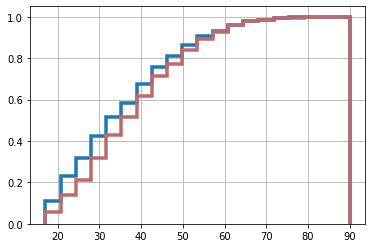

In [11]:
fm_age.hist(density = 1, histtype = 'step', cumulative=True, linewidth=3.5, bins=20)

ml_age.hist(density = 1, histtype = 'step', cumulative=True, linewidth=3.5, color = sns.desaturate("indianred", .75), bins = 20)

In [30]:
df2 = df.drop(df.index[(df.income == '>50K\n') & (df['age'] > df['age'].median() + 35) & (df['age'] > df['age'].median() -15)])
#print(df2.head())
ml1_age = ml1['age']
fm1_age = fm1['age']
ml2_age = ml1_age.drop(ml1_age.index[ (ml1_age > df['age'].median() + 35) & (ml1_age > df['age'].median() - 15) ])
fm2_age = fm1_age.drop(fm1_age.index[ (fm1_age > df['age'].median() + 35) & (fm1_age > df['age'].median() - 15) ])

In [31]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
mu2fm = fm2_age.mean()
std2fm = fm2_age.std()
md2fm = fm2_age.median()
print("Men statistics:")
print("Mean:", mu2ml, "Std:", std2ml)
print("Median:", md2ml)
print("Min:", ml2_age.min(), "Max:", ml2_age.max())
print("Women statistics:")
print("Mean:", mu2fm, "Std:", std2fm)
print("Median:", md2fm)
print("Min:", fm2_age.min(), "Max:", fm2_age.max())


Men statistics:
Mean: 44.317982123920615 Std: 10.019749857171412
Median: 44.0
Min: 19 Max: 72
Women statistics:
Mean: 41.877028181041844 Std: 10.036441807343714
Median: 41.0
Min: 19 Max: 72


In [ ]:
df.to_csv("data/df.csv")